## Data Preproccessing

In [1]:
# !pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import load_model

### how to run and import preproccessed data

C:\Users\cpere\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cpere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


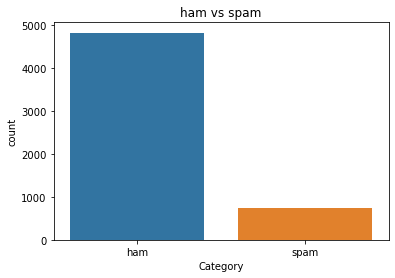

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minn

<ipython-input-3-b3c7715397b5>:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
<ipython-input-3-b3c7715397b5>:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


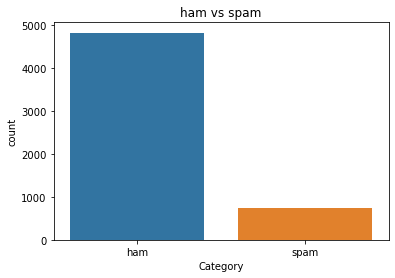

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0


<ipython-input-3-b3c7715397b5>:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
<ipython-input-3-b3c7715397b5>:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


In [3]:
%run Data_Preproccessing.ipynb     
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

### Neural Network with SGD optimizer

In [4]:
# model inspired from https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model
from keras.optimizers import SGD

LR = .01
MOMENTUM = .5
#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= SGD(lr=LR, momentum=MOMENTUM), metrics=['accuracy'] )

print(lstm.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
__________________________________________________

C:\Users\cpere\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
9/9 [==============================] - 15s 2s/step - loss: 0.6662 - accuracy: 0.8671 - val_loss: 0.6383 - val_accuracy: 0.8547
Epoch 2/17
9/9 [==============================] - 15s 2s/step - loss: 0.6131 - accuracy: 0.8687 - val_loss: 0.5871 - val_accuracy: 0.8547
Epoch 3/17
9/9 [==============================] - 15s 2s/step - loss: 0.5630 - accuracy: 0.8687 - val_loss: 0.5448 - val_accuracy: 0.8547
Epoch 4/17
9/9 [==============================] - 17s 2s/step - loss: 0.5219 - accuracy: 0.8687 - val_loss: 0.5114 - val_accuracy: 0.8547
Epoch 5/17
9/9 [==============================] - 17s 2s/step - loss: 0.4910 - accuracy: 0.8687 - val_loss: 0.4849 - val_accuracy: 0.8547
Epoch 6/17
9/9 [==============================] - 17s 2s/step - loss: 0.4638 - accuracy: 0.8687 - val_loss: 0.4633 - val_accuracy: 0.8547
Epoch 7/17
9/9 [==============================] - 17s 2s/step - loss: 0.4425 - accuracy: 0.8687 - val_loss: 0.4474 - val_accuracy: 0.8547
Epoch 8/17
9/9 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


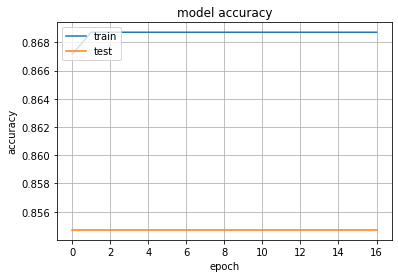

In [6]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### Neural Network with adam optimizer

In [7]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'] )

print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
________________________________________________

In [ ]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
9/9 [==============================] - 21s 2s/step - loss: 0.6592 - accuracy: 0.7864 - val_loss: 0.5774 - val_accuracy: 0.8547
Epoch 2/17
9/9 [==============================] - 21s 2s/step - loss: 0.4477 - accuracy: 0.8687 - val_loss: 0.4503 - val_accuracy: 0.8547
Epoch 3/17
9/9 [==============================] - 21s 2s/step - loss: 0.3638 - accuracy: 0.8687 - val_loss: 0.3595 - val_accuracy: 0.8547
Epoch 4/17
9/9 [==============================] - 21s 2s/step - loss: 0.3127 - accuracy: 0.8687 - val_loss: 0.2949 - val_accuracy: 0.8547
Epoch 5/17
9/9 [==============================] - 22s 2s/step - loss: 0.2233 - accuracy: 0.8772 - val_loss: 0.2224 - val_accuracy: 0.8906
Epoch 6/17
9/9 [==============================] - 22s 2s/step - loss: 0.1501 - accuracy: 0.9569 - val_loss: 0.1476 - val_accuracy: 0.9614
Epoch 7/17
9/9 [==============================] - 22s 2s/step - loss: 0.1053 - accuracy: 0.9823 - val_loss: 0.1036 - val_accuracy: 0.9758
Epoch 8/17
9/9 [==================

In [ ]:
# save model 
lstm.save('lstmModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('lstmModel.h5')
savedModel.summary()

In [ ]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
# test our model
y_pred=lstm.predict(X_test)
print(y_pred)
y_pred=(y_pred>0.5) # assign true(spam) if > .5
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt=''); 

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); 
ax.set_ylabel('True labels');
ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
print(classification_report(y_test, y_pred))